In [1]:
# -*- coding: utf-8 -*-
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# http://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or
# implied.
# See the License for the specific language governing permissions and
# limitations under the License.
#

# Pandas = Panel Data
Pandas documentation: https://pandas.pydata.org/pandas-docs/version/0.17.0/10min.html

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Series

In [3]:
s = pd.Series([1, 3, 5, np.nan, 6, 8])
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

### DataFrame

In [4]:
dates = pd.date_range('20130101', periods=6)
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [25]:
df = pd.DataFrame(np.random.randn(6,4), index=dates, columns=list('ABCD'))
df

,A,B,C,D
2013-01-01,0.140014,0.035899,-0.663031,-0.976898
2013-01-02,1.397926,1.438094,1.231052,0.811537
2013-01-03,-0.869520,-0.700365,1.275813,-0.618113
2013-01-04,0.634710,2.282373,0.742134,-1.274899
2013-01-05,0.320716,0.083406,0.087524,0.719134
2013-01-06,-0.426878,-0.573359,-0.127401,0.729583


### Creating a DataFrame by passing a dict of objects

In [6]:
df2 = pd.DataFrame({ 'A' : 1.,
                     'B' : pd.Timestamp('20130102'),
                     'C' : pd.Series(1,index=list(range(4)),dtype='float32'),
                     'D' : np.array([3] * 4,dtype='int32'),
                     'E' : pd.Categorical(["test","train","test","train"]),
                     'F' : 'foo' })
df2

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


# Viewing data

In [7]:
df2.dtypes

A          float64
B    datetime64[s]
C          float32
D            int32
E         category
F           object
dtype: object

In [8]:
df.head()

,A,B,C,D
2013-01-01,-1.235631,1.200096,0.053278,-0.048524
2013-01-02,2.092495,-1.208764,0.520858,-0.607723
2013-01-03,-0.623853,-2.125167,-0.529664,-0.094218
2013-01-04,-0.193529,-0.311694,-1.597047,-0.237420
2013-01-05,2.155514,0.876469,-0.129611,-0.498460


In [9]:
df.tail(2)

,A,B,C,D
2013-01-05,2.155514,0.876469,-0.129611,-0.498460
2013-01-06,2.879068,1.350626,-0.275302,-1.569407


In [10]:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,0.845677,-0.036406,-0.326248,-0.509292
std,1.730677,1.421215,0.715430,0.564297
min,-1.235631,-2.125167,-1.597047,-1.569407
25%,-0.516272,-0.984496,-0.466073,-0.580408
50%,0.949483,0.282387,-0.202456,-0.367940
75%,2.139759,1.119190,0.007556,-0.130018
max,2.879068,1.350626,0.520858,-0.048524


In [11]:
df.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

# Transposing data

In [26]:
df.T

,2013-01-01,2013-01-02,2013-01-03,2013-01-04,2013-01-05,2013-01-06
A,0.140014,1.397926,-0.869520,0.634710,0.320716,-0.426878
B,0.035899,1.438094,-0.700365,2.282373,0.083406,-0.573359
C,-0.663031,1.231052,1.275813,0.742134,0.087524,-0.127401
D,-0.976898,0.811537,-0.618113,-1.274899,0.719134,0.729583


# Data selection

**One column = Series**

In [27]:
print(type(df['A']))
df['A']

<class 'pandas.core.series.Series'>


2013-01-01    0.140014
2013-01-02    1.397926
2013-01-03   -0.869520
2013-01-04    0.634710
2013-01-05    0.320716
2013-01-06   -0.426878
Freq: D, Name: A, dtype: float64

**Slicing**

In [ ]:
df[0:3]

**Selection by label**

In [28]:
df.loc[dates[0]]

A    0.140014
B    0.035899
C   -0.663031
D   -0.976898
Name: 2013-01-01 00:00:00, dtype: float64

In [29]:
df.loc[:,['A','B']]

,A,B
2013-01-01,0.140014,0.035899
2013-01-02,1.397926,1.438094
2013-01-03,-0.869520,-0.700365
2013-01-04,0.634710,2.282373
2013-01-05,0.320716,0.083406
2013-01-06,-0.426878,-0.573359


**Selection by Position**

In [30]:
df.iloc[1,1]

1.438093745336112

In [31]:
df.iloc[3:5,0:2]

,A,B
2013-01-04,0.634710,2.282373
2013-01-05,0.320716,0.083406


**Boolean Indexing**

In [ ]:
df[df.A > 0]

In [ ]:
df[df > 0]

**Setting values ​​by label**

In [32]:
df.at[dates[0],'A'] = 0
df

,A,B,C,D
2013-01-01,0.000000,0.035899,-0.663031,-0.976898
2013-01-02,1.397926,1.438094,1.231052,0.811537
2013-01-03,-0.869520,-0.700365,1.275813,-0.618113
2013-01-04,0.634710,2.282373,0.742134,-1.274899
2013-01-05,0.320716,0.083406,0.087524,0.719134
2013-01-06,-0.426878,-0.573359,-0.127401,0.729583


# Missing Data

In [ ]:
df1 = df.reindex(index=dates[0:4], columns=list(df.columns) + ['E'])
df1

In [ ]:
df1.loc[dates[0]:dates[1],'E'] = 1
df1

In [ ]:
df1.dropna(how='any')

In [ ]:
df1.fillna(value=5)

**Boolean mask where values ​​are NaN**

In [ ]:
pd.isnull(df1)

# Operations

In [33]:
df.mean()

A    0.176159
B    0.427674
C    0.424349
D   -0.101609
dtype: float64

In [34]:
df.mean(axis=0)
# df.mean(axis=1)

A    0.176159
B    0.427674
C    0.424349
D   -0.101609
dtype: float64

### Applying functions to the data

In [35]:
df.apply(np.cumsum)

,A,B,C,D
2013-01-01,0.000000,0.035899,-0.663031,-0.976898
2013-01-02,1.397926,1.473992,0.568021,-0.165361
2013-01-03,0.528406,0.773627,1.843834,-0.783474
2013-01-04,1.163115,3.056000,2.585968,-2.058373
2013-01-05,1.483831,3.139406,2.673493,-1.339239
2013-01-06,1.056953,2.566047,2.546092,-0.609656


In [ ]:
df.apply(lambda x: x.max() - x.min())

# Merging data

## Concat

In [36]:
df = pd.DataFrame(np.random.randn(10, 4))
df

,0,1,2,3
0,1.254679,-0.195832,-1.367674,0.403929
1,-1.172023,0.651990,-1.443828,-1.880513
2,0.335778,0.397850,0.610826,-0.956014
3,0.688481,1.081667,-0.432956,0.081609
4,-0.253349,0.213747,-1.145179,0.867461
5,-0.028848,-0.588585,0.610408,-1.479041
6,-0.452559,1.981616,0.011995,-0.865044
7,0.279697,0.405270,-1.546285,1.240889
8,-0.363015,-1.434978,-0.673668,3.326920
9,0.978891,0.290781,-0.464269,-0.021462


In [ ]:
pieces = [df[:3], df[3:7], df[7:]]
pieces

In [ ]:
len(pieces)

In [ ]:
pieces[1]

In [ ]:
pd.concat(pieces)


## Join

In [37]:
left = pd.DataFrame({'key': ['k1', 'k2'], 'lval': [1, 2]})
left

,key,lval
0,k1,1
1,k2,2


In [38]:
right = pd.DataFrame({'key': ['k1', 'k2'], 'rval': [3, 4]})
right

,key,rval
0,k1,3
1,k2,4


In [39]:
pd.merge(left, right, on='key')

,key,lval,rval
0,k1,1,3
1,k2,2,4


## Grouping

In [50]:
df = pd.DataFrame({'A' : ['foo', 'bar', 'foo', 'bar',
                          'foo', 'bar', 'foo', 'foo'],
                   'B' : ['one', 'one', 'two', 'three',
                          'two', 'two', 'one', 'three'],
                   'C' : np.random.randn(8),
                   'D' : np.random.randn(8)})
df

,A,B,C,D
0,foo,one,1.547807,0.323091
1,bar,one,-0.790602,-0.083486
2,foo,two,0.245715,-0.501175
3,bar,three,0.346799,-1.221986
4,foo,two,1.114589,-0.366607
5,bar,two,-0.812693,-0.355680
6,foo,one,-0.807853,-1.357836
7,foo,three,1.202997,-0.121110


In [42]:
df.groupby('A').sum()

,B,C,D
A,,,
bar,onethreetwo,1.003459,0.559312
foo,onetwotwoonethree,-3.129093,1.682125


In [43]:
df.groupby(['A','B']).sum()

C         D
A   B                        
bar one    0.192391  1.559930
    three  0.534646 -0.556522
    two    0.276422 -0.444095
foo one   -1.701121  2.253683
    three -0.663480 -1.633154
    two   -0.764492  1.061596

## Reshaping

### Stack

In [13]:
tuples = list(zip(*[['bar', 'bar', 'baz', 'baz',
                     'foo', 'foo', 'qux', 'qux'],
                    ['one', 'two', 'one', 'two',
                     'one', 'two', 'one', 'two']]))
tuples

[('bar', 'one'),
 ('bar', 'two'),
 ('baz', 'one'),
 ('baz', 'two'),
 ('foo', 'one'),
 ('foo', 'two'),
 ('qux', 'one'),
 ('qux', 'two')]

In [ ]:
index = pd.MultiIndex.from_tuples(tuples, names=['first', 'second'])
index

In [ ]:
df = pd.DataFrame(np.random.randn(8, 2), index=index, columns=['A', 'B'])
df

In [ ]:
df2 = df[:4]
df2

In [ ]:
stacked = df2.stack()
stacked

In [ ]:
stacked.shape

**With a “stacked” DataFrame or Series (having a MultiIndex as the index), the inverse operation of stack() is unstack(), which by default unstacks the last level:**

In [ ]:
stacked.unstack()

### Pivot Tables

In [14]:
df = pd.DataFrame({'A' : ['one', 'one', 'two', 'three'] * 3,
                   'B' : ['A', 'B', 'C'] * 4,
                   'C' : ['foo', 'foo', 'foo', 'bar', 'bar', 'bar'] * 2,
                   'D' : np.random.randn(12),
                   'E' : np.random.randn(12)})
df

,A,B,C,D,E
0,one,A,foo,1.264616,0.840503
1,one,B,foo,-0.216828,0.128329
2,two,C,foo,-0.594417,-1.000622
3,three,A,bar,0.326683,0.831565
4,one,B,bar,0.254139,-0.415360
5,one,C,bar,-0.351691,1.302322
6,two,A,foo,1.063071,-0.191175
7,three,B,foo,-1.297278,0.093258
8,one,C,foo,-0.207005,-2.112942
9,one,A,bar,1.735765,0.950042


In [49]:
pd.pivot_table(df, values='D', index=['A', 'B'], columns=['C'])

,C,-2.125634,-1.462154,-0.477141,-0.439686,-0.247295,-0.200719,-0.017318,0.517329
A,B,,,,,,,,
foo,one,NaN,NaN,NaN,1.200649,NaN,NaN,NaN,NaN
foobar,oneone,NaN,NaN,NaN,NaN,2.760579,NaN,NaN,NaN
foobarfoo,oneonetwo,NaN,NaN,NaN,NaN,NaN,NaN,2.903255,NaN
foobarfoobar,oneonetwothree,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.346733
foobarfoobarfoo,oneonetwothreetwo,NaN,NaN,3.265652,NaN,NaN,NaN,NaN,NaN
foobarfoobarfoobar,oneonetwothreetwotwo,NaN,NaN,NaN,NaN,NaN,2.821557,NaN,NaN
foobarfoobarfoobarfoo,oneonetwothreetwotwoone,NaN,3.874591,NaN,NaN,NaN,NaN,NaN,NaN
foobarfoobarfoobarfoofoo,oneonetwothreetwotwoonethree,2.241437,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Time Series

In [15]:
rng = pd.date_range('1/1/2012', periods=100, freq='S')
rng

C:\Users\katka\AppData\Local\Temp\ipykernel_31268\2150156700.py:1: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  rng = pd.date_range('1/1/2012', periods=100, freq='S')


DatetimeIndex(['2012-01-01 00:00:00', '2012-01-01 00:00:01',
               '2012-01-01 00:00:02', '2012-01-01 00:00:03',
               '2012-01-01 00:00:04', '2012-01-01 00:00:05',
               '2012-01-01 00:00:06', '2012-01-01 00:00:07',
               '2012-01-01 00:00:08', '2012-01-01 00:00:09',
               '2012-01-01 00:00:10', '2012-01-01 00:00:11',
               '2012-01-01 00:00:12', '2012-01-01 00:00:13',
               '2012-01-01 00:00:14', '2012-01-01 00:00:15',
               '2012-01-01 00:00:16', '2012-01-01 00:00:17',
               '2012-01-01 00:00:18', '2012-01-01 00:00:19',
               '2012-01-01 00:00:20', '2012-01-01 00:00:21',
               '2012-01-01 00:00:22', '2012-01-01 00:00:23',
               '2012-01-01 00:00:24', '2012-01-01 00:00:25',
               '2012-01-01 00:00:26', '2012-01-01 00:00:27',
               '2012-01-01 00:00:28', '2012-01-01 00:00:29',
               '2012-01-01 00:00:30', '2012-01-01 00:00:31',
               '2012-01-

In [ ]:
ts = pd.Series(np.random.randint(0, 500, len(rng)), index=rng)
ts

In [44]:
ts.resample('5Min').sum()

2000-01-01 00:00:00    -0.099128
2000-01-01 00:05:00     0.000000
2000-01-01 00:10:00     0.000000
2000-01-01 00:15:00     0.000000
2000-01-01 00:20:00     0.000000
                         ...    
2002-09-25 23:40:00     0.000000
2002-09-25 23:45:00     0.000000
2002-09-25 23:50:00     0.000000
2002-09-25 23:55:00     0.000000
2002-09-26 00:00:00   -39.537390
Freq: 5min, Length: 287713, dtype: float64

In [ ]:
rng = pd.date_range('3/6/2012 00:00', periods=5, freq='D')
rng

In [ ]:
ts = pd.Series(np.random.randn(len(rng)), rng)
ts

In [45]:
ts_utc = ts.tz_localize('UTC')
ts_utc

2000-01-01 00:00:00+00:00    -0.099128
2000-01-02 00:00:00+00:00     1.310521
2000-01-03 00:00:00+00:00     1.033143
2000-01-04 00:00:00+00:00     1.603449
2000-01-05 00:00:00+00:00     0.729237
                               ...    
2002-09-22 00:00:00+00:00   -36.023282
2002-09-23 00:00:00+00:00   -36.827631
2002-09-24 00:00:00+00:00   -39.134229
2002-09-25 00:00:00+00:00   -39.903102
2002-09-26 00:00:00+00:00   -39.537390
Freq: D, Length: 1000, dtype: float64

# Categoricals

In [16]:
df = pd.DataFrame({"id":[1,2,3,4,5,6], "raw_grade":['a', 'b', 'b', 'a', 'a', 'e']})
df

,id,raw_grade
0,1,a
1,2,b
2,3,b
3,4,a
4,5,a
5,6,e


In [46]:
df["grade"] = df["raw_grade"].astype("category")
df["grade"]

KeyError: 'raw_grade'

In [ ]:
df["verbal_grade"] = df["grade"].cat.rename_categories(["bad", "good", "very good"])
df["verbal_grade"]

In [ ]:
df.sort_values(by="grade")

In [ ]:
df.groupby("grade").size()

# Plotting

In [20]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
ts

2000-01-01   -0.099128
2000-01-02    1.409649
2000-01-03   -0.277378
2000-01-04    0.570306
2000-01-05   -0.874212
                ...   
2002-09-22   -1.080808
2002-09-23   -0.804350
2002-09-24   -2.306598
2002-09-25   -0.768873
2002-09-26    0.365712
Freq: D, Length: 1000, dtype: float64

In [21]:
ts = ts.cumsum()
ts

2000-01-01    -0.099128
2000-01-02     1.310521
2000-01-03     1.033143
2000-01-04     1.603449
2000-01-05     0.729237
                ...    
2002-09-22   -36.023282
2002-09-23   -36.827631
2002-09-24   -39.134229
2002-09-25   -39.903102
2002-09-26   -39.537390
Freq: D, Length: 1000, dtype: float64

<Axes: >

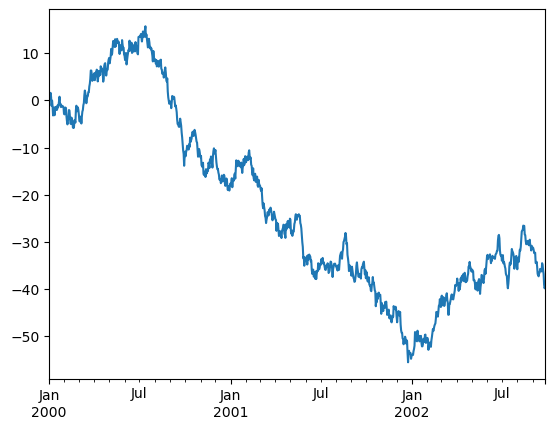

In [22]:
ts.plot()

In [23]:
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index,
                  columns=['A', 'B', 'C', 'D'])
df

,A,B,C,D
2000-01-01,-0.206887,0.725031,0.726124,2.672389
2000-01-02,-0.388183,-0.441991,-0.227320,-0.805283
2000-01-03,1.936299,-1.166604,1.227676,-0.331085
2000-01-04,-0.456633,0.786261,0.588640,-0.830528
2000-01-05,1.550493,0.795883,0.399718,-2.313939
...,...,...,...,...
2002-09-22,0.422267,-1.801185,-1.390711,-1.770097
2002-09-23,0.207638,-0.714447,-0.261846,1.920419
2002-09-24,-0.326755,0.536704,0.587904,-0.615824
2002-09-25,2.010571,0.107678,0.992121,1.220067


In [48]:
df = df.cumsum()
df

,A,B,C,D
0,foo,one,-0.439686,1.200649
1,foobar,oneone,-0.247295,2.760579
2,foobarfoo,oneonetwo,-0.017318,2.903255
3,foobarfoobar,oneonetwothree,0.517329,2.346733
4,foobarfoobarfoo,oneonetwothreetwo,-0.477141,3.265652
5,foobarfoobarfoobar,oneonetwothreetwotwo,-0.200719,2.821557
6,foobarfoobarfoobarfoo,oneonetwothreetwotwoone,-1.462154,3.874591
7,foobarfoobarfoobarfoofoo,oneonetwothreetwotwoonethree,-2.125634,2.241437


<Figure size 640x480 with 0 Axes>

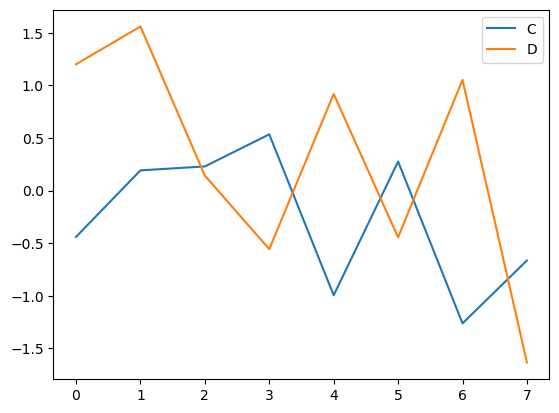

In [47]:
plt.figure() 
df.plot() 
plt.legend(loc='best')

# 100-pandas-puzzles

**https://github.com/FIIT-IAU/100-pandas-puzzles** (forked from https://github.com/ajcr/100-pandas-puzzles)